Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!
Page 10 scraped successfully!
Page 11 scraped successfully!
Page 12 scraped successfully!
Page 13 scraped successfully!
Page 14 scraped successfully!
Page 15 scraped successfully!
Page 16 scraped successfully!
Page 17 scraped successfully!
Page 18 scraped successfully!
Page 19 scraped successfully!
Page 20 scraped successfully!
Page 21 scraped successfully!
Page 22 scraped successfully!
Page 23 scraped successfully!
Page 24 scraped successfully!
Page 25 scraped successfully!
Page 26 scraped successfully!


Scrape complete!


,posted,neighborhood,post title,number bedrooms,sqft,URL,price
52,2022-08-02 13:51,(Minneapolis),The building is very accessible to many bus routes,4.0,1222.0,https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-the-building-is-very/7516444195.html,887


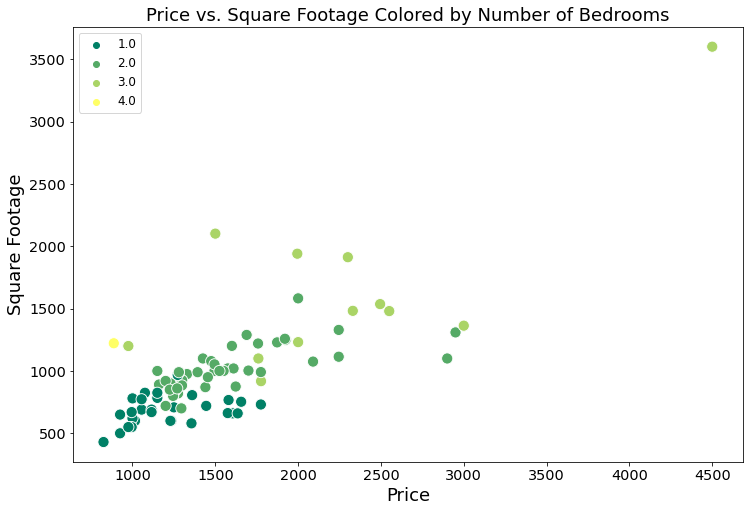

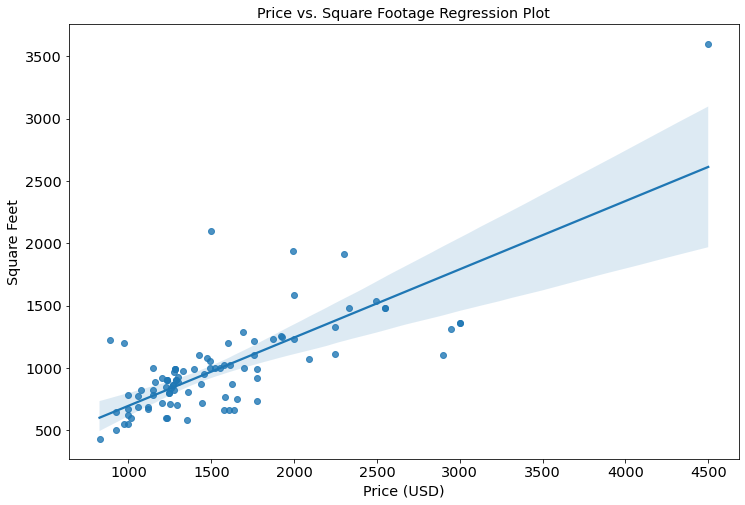

In [9]:
from requests import get
from bs4 import BeautifulSoup
import numpy as nm 
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
response = get('https://minneapolis.craigslist.org/search/apa?hasPic=1&availabilityMode=0') # Got the request from website 
html_soup = BeautifulSoup(response.text, 'html.parser')          # Parsed it into a more user-friendly data 
results_num = html_soup.find('div', class_= 'search-legend')                      
results_total = int(results_num.find('span', class_='totalcount').text)        #Got the number of total apartments
pages = nm.arange(0, results_total+1, 120)         #Page limit is 120 posts so go through 120 at a time untill end
iterations = 0
post_timing = []
post_hoods = []
post_title_texts = []
bedroom_counts = []
sqfts = []
post_links = []
post_prices = []
for page in pages:                     #Iterate through the pages 
    response = get('https://minneapolis.craigslist.org/search/apa?s='+ str(page)+ 'hasPic=1&availabilityMode=0')
    if response.status_code != 200:  #if something is wrong with the website like error 404 break 
        break
    page_html = BeautifulSoup(response.text, 'html.parser')
    posts = html_soup.find_all('li', class_= 'result-row')     
    for post in posts: 
        if post.find('span', class_ = 'result-hood') is not None:
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)                                      #Get date and time and add to list 
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)                            #Get neighborhood and add to list 
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text                               #Get title and add to list 
            post_title_texts.append(post_title_text)
            post_link = post_title['href']
            post_links.append(post_link)                           #Get link and add to list 
            post_price = int(post.a.text.strip().replace("$", "").replace(",","")) 
            post_prices.append(post_price)                 #Get price and add to list 
            if post.find('span', class_ = 'housing') is not None:
                if 'ft2' in post.find('span', class_ = 'housing').text.split()[0]:
                    bedroom_count = nm.nan
                    bedroom_counts.append(bedroom_count)                     # Bedrooms aren't present but sqft os 
                    sqft = int(post.find('span', class_ = 'housing').text.split()[0][:-3])
                    sqfts.append(sqft)
                elif len(post.find('span', class_ = 'housing').text.split()) > 2:
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)      #Bedroom and Square feet are present 
                    sqft = int(post.find('span', class_ = 'housing').text.split()[2][:-3])
                    sqfts.append(sqft)
                elif len(post.find('span', class_ = 'housing').text.split()) == 2:
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    sqft = nm.nan                                #Bedroom is present but sqft isn't 
                    sqfts.append(sqft)                           
                else:
                    bedroom_count = nm.nan
                    bedroom_counts.append(bedroom_count) #Bedroom and sqft aren't present 
                    sqft = nm.nan
                    sqfts.append(sqft)
            else:
                bedroom_count = nm.nan
                bedroom_counts.append(bedroom_count)   #if housing isn't found make sqft and bedroom nm.nan
                sqft = nm.nan
                sqfts.append(sqft)          
    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")
print("\n")
print("Scrape complete!")
Mpls_apts = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                       'number bedrooms': bedroom_counts,     # Create dataframe from the lists
                        'sqft': sqfts,
                        'URL': post_links,
                       'price': post_prices})
Mpls_apts['number bedrooms'] = Mpls_apts['number bedrooms'].apply(lambda x: float(x)) # change number to floats since nm.nan is a float too 
Mpls_apts = Mpls_apts.drop_duplicates(subset='URL')  # Gets rid of same posts 
pd.set_option('display.max_colwidth', 10000)  #Make sure I can see the full link
idx = nm.where((Mpls_apts['number bedrooms']>= 4) & (Mpls_apts['price'] <= 2000)) #Gets posts that fit a specific parameter
display(Mpls_apts.loc[idx])
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.figure(figsize=(12, 8))                
sns.scatterplot(x='price', y='sqft', hue='number bedrooms', palette='summer', x_jitter=True, y_jitter=True, s=125, data=Mpls_apts.dropna())
plt.legend(fontsize=12)
plt.xlabel("Price", fontsize=18)    #creates a scatterplot 
plt.ylabel("Square Footage", fontsize=18)
plt.title("Price vs. Square Footage Colored by Number of Bedrooms", fontsize=18)
plt.show()
plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='sqft', data=Mpls_apts.dropna())
plt.title('Price vs. Square Footage Regression Plot')           #creates a regression plot
plt.xlabel("Price (USD)")
plt.ylabel("Square Feet")
plt.show()